In [1]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import gym
from gym import wrappers
from gym.envs.toy_text.frozen_lake import generate_random_map, FrozenLakeEnv
from hiive.mdptoolbox.example import forest
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
#from hiive.mdptoolbox.openai import OpenAI_MDPToolbox
import warnings
warnings.filterwarnings("ignore")

In [4]:

class OpenAI_MDPToolbox:

    """Class to convert Discrete Open AI Gym environemnts to MDPToolBox environments. 
    You can find the list of available gym environments here: https://gym.openai.com/envs/#classic_control
    You'll have to look at the source code of the environments for available kwargs; as it is not well documented.  
    """
    
    def __init__(self, openAI_env_name:str, render:bool=False, **kwargs):
        """Create a new instance of the OpenAI_MDPToolbox class
        :param openAI_env_name: Valid name of an Open AI Gym env 
        :type openAI_env_name: str
        :param render: whether to render the Open AI gym env
        :type rander: boolean 
        """
        self.env_name = openAI_env_name
    
        self.env = gym.make(self.env_name, **kwargs)
        self.env.reset(seed = 5)

        if render:
            self.env.render()
        
        self.transitions = self.env.P
        self.actions = int(re.findall(r'\d+', str(self.env.action_space))[0])
        self.states = int(re.findall(r'\d+', str(self.env.observation_space))[0])
        self.P = np.zeros((self.actions, self.states, self.states))
        self.R = np.zeros((self.states, self.actions))
        self.convert_PR()
        
    def convert_PR(self):
        """Converts the transition probabilities provided by env.P to MDPToolbox-compatible P and R arrays
        """
        for state in range(self.states):
            for action in range(self.actions):
                for i in range(len(self.transitions[state][action])):
                    tran_prob = self.transitions[state][action][i][0]
                    state_ = self.transitions[state][action][i][1]
                    self.R[state][action] += tran_prob*self.transitions[state][action][i][2]
                    self.P[action, state, state_] += tran_prob

In [5]:
np.random.seed(23)
mdp_p, mdp_r = forest(S=400, r1=25, r2=8, p=0.05)
gamma_val = [0.2,0.4,0.6,0.8, 0.9]

val_iter_df = pd.DataFrame()
pol_iter_df = pd.DataFrame()
init_time = time.time()
for i in gamma_val:
    vi = ValueIteration(mdp_p, mdp_r, gamma=i, epsilon = 0.0001)
    vi_df = pd.DataFrame(vi.run())
    vi_df['gamma'] = i
    val_iter_df = val_iter_df.append(vi_df)
    pit = PolicyIteration(mdp_p, mdp_r, gamma=i)
    pi_df = pd.DataFrame(pit.run())
    pi_df['gamma'] = i
    pol_iter_df = pol_iter_df.append(pi_df)

print("Time taken:", time.time() - init_time)

Time taken: 0.325394868850708


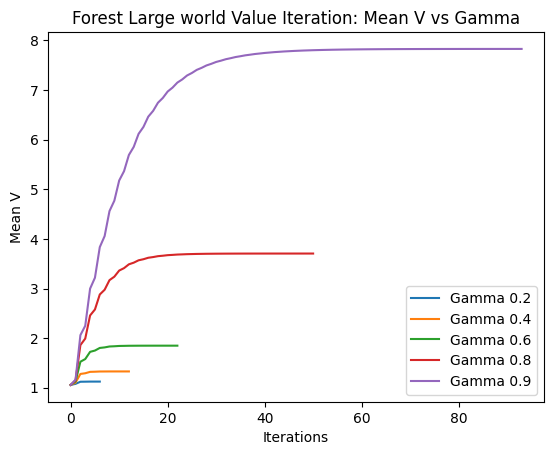

In [6]:
plt.figure()
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.2]['Mean V'], label = "Gamma 0.2")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.4]['Mean V'], label = "Gamma 0.4")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.6]['Mean V'], label = "Gamma 0.6")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.8]['Mean V'], label = "Gamma 0.8")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.9]['Mean V'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Mean V')
plt.title('Forest Large world Value Iteration: Mean V vs Gamma')
plt.legend()
plt.savefig('./plots/forest_large_vi_meanv_gamma.png')
plt.show()

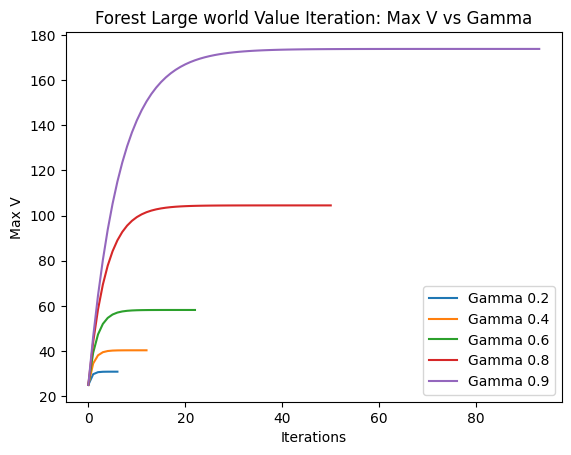

In [7]:
plt.figure()
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.2]['Max V'], label = "Gamma 0.2")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.4]['Max V'], label = "Gamma 0.4")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.6]['Max V'], label = "Gamma 0.6")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.8]['Max V'], label = "Gamma 0.8")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.9]['Max V'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Max V')
plt.title('Forest Large world Value Iteration: Max V vs Gamma')
plt.legend()
plt.savefig('./plots/forest_large_vi_maxv_gamma.png')
plt.show()

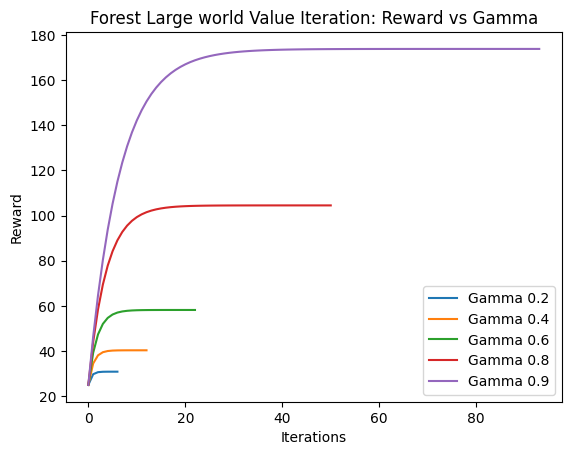

In [9]:
plt.figure()
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.2]['Reward'], label = "Gamma 0.2")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.4]['Reward'], label = "Gamma 0.4")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.6]['Reward'], label = "Gamma 0.6")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.8]['Reward'], label = "Gamma 0.8")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.9]['Reward'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.title('Forest Large world Value Iteration: Reward vs Gamma')
plt.legend()
plt.savefig('./plots/forest_large_vi_reward_gamma.png')
plt.show()

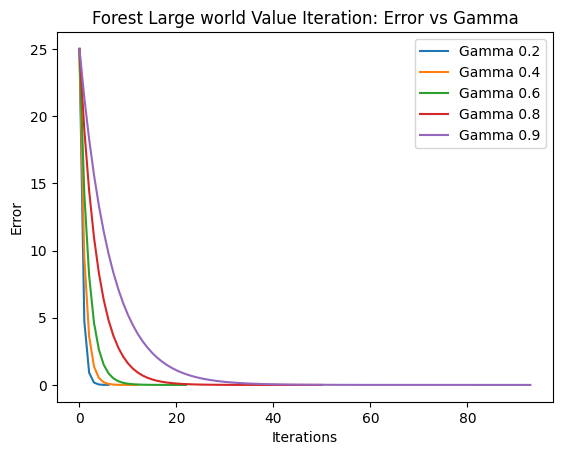

In [10]:
plt.figure()
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.2]['Error'], label = "Gamma 0.2")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.4]['Error'], label = "Gamma 0.4")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.6]['Error'], label = "Gamma 0.6")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.8]['Error'], label = "Gamma 0.8")
plt.plot(val_iter_df[val_iter_df['gamma'] == 0.9]['Error'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Forest Large world Value Iteration: Error vs Gamma')
plt.legend()
plt.savefig('./plots/forest_large_vi_error_gamma.png')
plt.show()

          gamma      Time  Iteration       Max V
gamma                                           
0.2   6     0.2  0.001318          7   30.866383
0.4   12    0.4  0.001350         13   40.337244
0.6   22    0.6  0.002197         23   58.202711
0.8   50    0.8  0.005682         51  104.526402
0.9   93    0.9  0.009447         94  173.843912


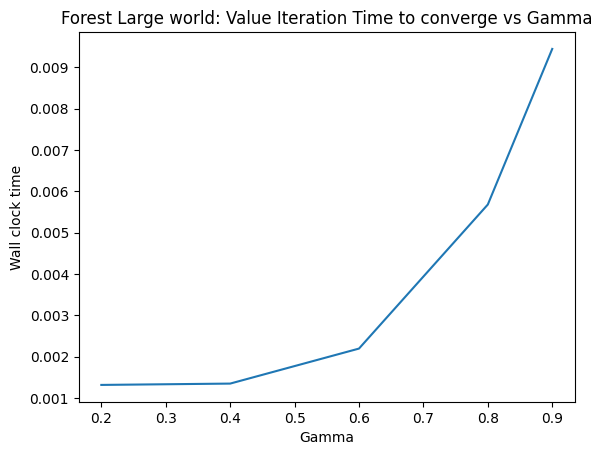

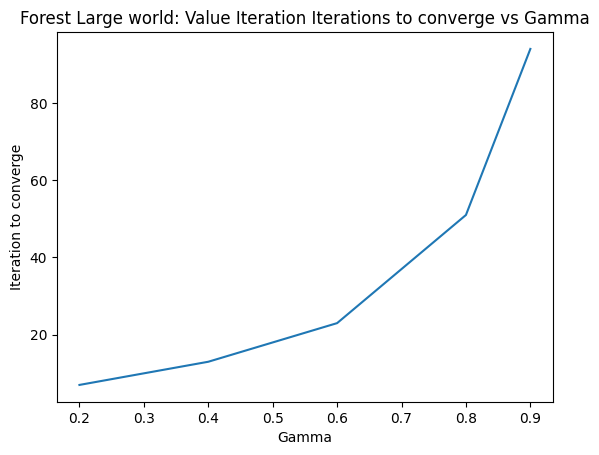

In [11]:
vlg = pd.DataFrame(val_iter_df[['gamma','Time','Iteration','Max V']].
                   groupby('gamma').apply(lambda x: x.iloc[[ -1]]))
print(vlg)

plt.plot(vlg['gamma'], vlg['Time'])
plt.xlabel('Gamma')
plt.ylabel('Wall clock time')
plt.title('Forest Large world: Value Iteration Time to converge vs Gamma')
plt.savefig('./plots/forest_large_vi_time_gamma.png')
plt.show()

plt.plot(vlg['gamma'], vlg['Iteration'])
plt.xlabel('Gamma')
plt.ylabel('Iteration to converge')
plt.title('Forest Large world: Value Iteration Iterations to converge vs Gamma')
plt.savefig('./plots/forest_large_vi_iterations_gamma.png')
plt.show()

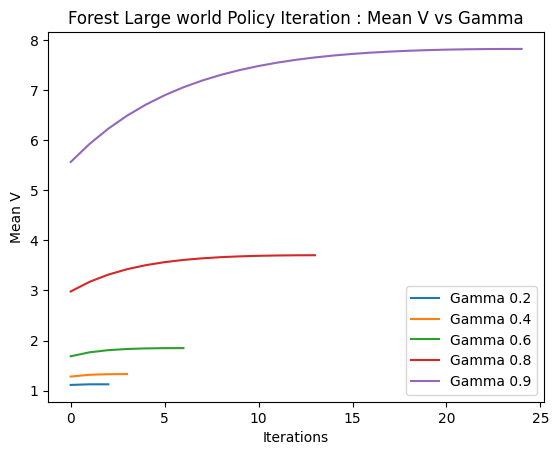

In [12]:
plt.figure()
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.2]['Mean V'], label = "Gamma 0.2")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.4]['Mean V'], label = "Gamma 0.4")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.6]['Mean V'], label = "Gamma 0.6")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.8]['Mean V'], label = "Gamma 0.8")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.9]['Mean V'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Mean V')
plt.title('Forest Large world Policy Iteration : Mean V vs Gamma')
plt.legend()
plt.savefig('./plots/forest_large_pi_meanv_gamma.png')
plt.show()

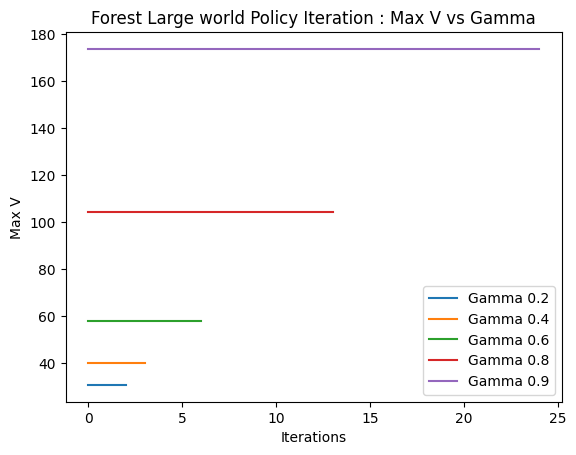

In [13]:
plt.figure()
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.2]['Max V'], label = "Gamma 0.2")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.4]['Max V'], label = "Gamma 0.4")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.6]['Max V'], label = "Gamma 0.6")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.8]['Max V'], label = "Gamma 0.8")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.9]['Max V'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Max V')
plt.title('Forest Large world Policy Iteration : Max V vs Gamma')
plt.legend()
plt.savefig('./plots/forest_large_pi_maxv_gamma.png')
plt.show()

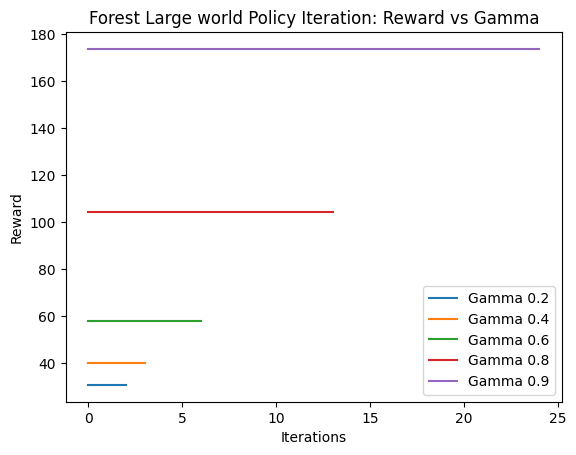

In [14]:
plt.figure()
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.2]['Reward'], label = "Gamma 0.2")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.4]['Reward'], label = "Gamma 0.4")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.6]['Reward'], label = "Gamma 0.6")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.8]['Reward'], label = "Gamma 0.8")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.9]['Reward'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.title('Forest Large world Policy Iteration: Reward vs Gamma')
plt.legend()
plt.savefig('./plots/forest_large_pi_reward_gamma.png')
plt.show()

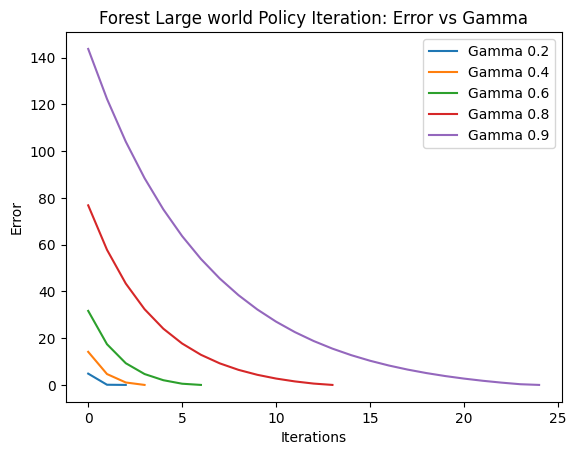

In [15]:
plt.figure()
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.2]['Error'], label = "Gamma 0.2")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.4]['Error'], label = "Gamma 0.4")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.6]['Error'], label = "Gamma 0.6")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.8]['Error'], label = "Gamma 0.8")
plt.plot(pol_iter_df[pol_iter_df['gamma'] == 0.9]['Error'], label = "Gamma 0.9")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Forest Large world Policy Iteration: Error vs Gamma')
plt.legend()
plt.savefig('./plots/forest_large_pi_error_gamma.png')
plt.show()

          gamma      Time  Iteration       Max V
gamma                                           
0.2   2     0.2  0.062487          3   30.866661
0.4   3     0.4  0.023126          4   40.337385
0.6   6     0.6  0.026097          7   58.202859
0.8   13    0.8  0.060459         14  104.526515
0.9   24    0.9  0.093930         25  173.844223


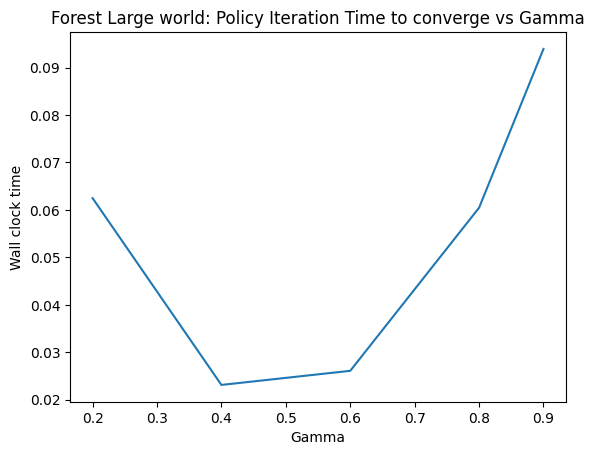

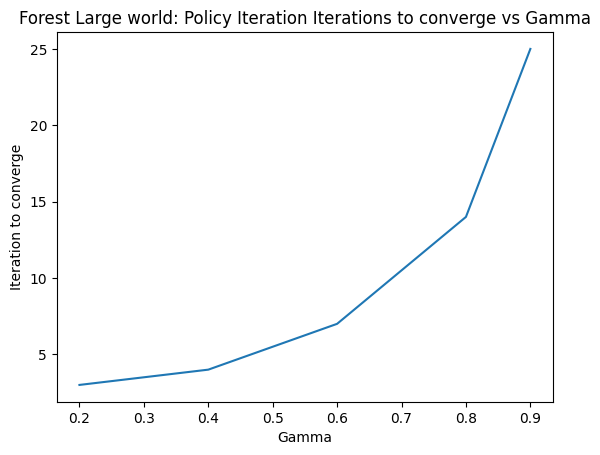

In [16]:
plg = pd.DataFrame(pol_iter_df[['gamma','Time','Iteration','Max V']].
                   groupby('gamma').apply(lambda x: x.iloc[[ -1]]))
print(plg)

plt.plot(plg['gamma'], plg['Time'])
plt.xlabel('Gamma')
plt.ylabel('Wall clock time')
plt.title('Forest Large world: Policy Iteration Time to converge vs Gamma')
plt.savefig('./plots/forest_large_pi_time_gamma.png')
plt.show()

plt.plot(plg['gamma'], plg['Iteration'])
plt.xlabel('Gamma')
plt.ylabel('Iteration to converge')
plt.title('Forest Large world: Policy Iteration Iterations to converge vs Gamma')
plt.savefig('./plots/forest_large_pi_iterations_gamma.png')
plt.show()

# Q Learning

In [17]:
def run_ql(gamma_val=[0.8], alpha_val=[1], epsilon_val=[1], ad=[0.9], ed=[0.95], iteration=[1e5]):
   
    
    ind_size = len(gamma_val)*len(alpha_val)*len(epsilon_val)*len(ad)*len(ed)*len(iteration)
    ql_df = pd.DataFrame(0,index=np.arange(ind_size), 
                         columns=['gamma','alpha','epsilon','alpha_decay','epsilon_decay','time',
                                  'iterations','reward','mean_rewards','max_rewards','error','policy'])
    qlearn_df = pd.DataFrame()
    counter_val = 0
    for j in alpha_val:
        for k in epsilon_val:
            for l in ad:
                for m in ed:
                    for n in iteration:
#                         ql = QLearning(mdp_p, mdp_r, n_iter=n, gamma=0.8, alpha=j, epsilon=k,
#                                        alpha_decay=l, epsilon_decay=m, alpha_min=0.001)
                        ql = QLearning(mdp_p, mdp_r, n_iter=n, gamma=0.9, alpha=j, epsilon=k
                                       )
                        qlo = ql.run()
                        temp_df = pd.DataFrame(qlo)
                        temp_df['gamma'] = 0.9
                        temp_df['alpha'] = j
                        temp_df['epsilon'] = k
                        temp_df['alpha_decay'] = l
                        temp_df['epsilon_decay'] = m
                        temp_df['n_iter'] = n
                        time  = qlo[-1]['Time']
                        iters = qlo[-1]['Iteration']
                        max_val  = qlo[-1]['Max V']
                        max_rewards, mean_rewards, errors = [], [], []
                        for o in qlo:
                            max_rewards.append(o['Max V'])
                            mean_rewards.append(o['Mean V'])
                            errors.append(o['Error']) 
                        policy = np.array(ql.policy)
                        #policy = np.reshape(policy, (15,15))
                        
                        ql_df['gamma'][counter_val] = 0.9
                        ql_df['alpha'][counter_val] = j
                        ql_df['epsilon'][counter_val] = k
                        ql_df['alpha_decay'][counter_val] = l
                        ql_df['epsilon_decay'][counter_val] = m
                        ql_df['time'][counter_val] = time
                        ql_df['iterations'][counter_val] = iters
                        ql_df['reward'][counter_val] = max_val
                        ql_df['mean_rewards'][counter_val] = {tuple(mean_rewards)}
                        ql_df['max_rewards'][counter_val] = {tuple(max_rewards)}
                        ql_df['error'][counter_val] = {tuple(errors)}
                        ql_df['policy'][counter_val] = {ql.policy}
                        
                        counter_val += 1
                        
                        
                        qlearn_df = qlearn_df.append(temp_df)
                        
                        
    return ql_df,qlearn_df
                        

In [21]:
init_time = time.time()
ql_df,qlearn_df = run_ql(gamma_val=[0.9], alpha_val=[0.5], epsilon_val=[0.1,0.2,0.4,0.6,0.8,0.9], ad=[0.9], ed=[0.95], iteration=[1e8])
print("Time taken to run:", time.time() - init_time)

Time taken to run: 22527.92034626007


In [22]:
ql_df

,gamma,alpha,epsilon,alpha_decay,epsilon_decay,time,iterations,reward,mean_rewards,max_rewards,error,policy
0,0.9,0.5,0.1,0.9,0.95,3736.811110,100000000,174.267715,"{(0.01807957797891685, 0.02059472757298458, 0....","{(1.9584788716899864, 2.1152240945369987, 2.24...","{(1.6665654936494275e-09, 0.0, 1.6092103394352...","{(0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,..."
1,0.9,0.5,0.2,0.9,0.95,3753.848928,100000000,168.945268,"{(0.3341866843196298, 0.3410895454936935, 0.34...","{(124.81648246074863, 125.06924945261065, 125....","{(0.0, 0.0, 2.2604204041935192e-08, 0.00474122...","{(0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,..."
2,0.9,0.5,0.4,0.9,0.95,3764.834151,100000000,172.575819,"{(0.03649385797912997, 0.04138610601485727, 0....","{(4.779923510507269, 4.908657661732725, 4.9947...","{(4.2495904926587966e-06, 3.899539662256022e-0...","{(0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,..."
3,0.9,0.5,0.6,0.9,0.95,3766.087613,100000000,172.898677,"{(0.039766537404101146, 0.04351990597451008, 0...","{(4.3463150587721495, 4.634137170488764, 4.816...","{(2.952233748688451e-06, 2.8107421101367626e-0...","{(0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
4,0.9,0.5,0.8,0.9,0.95,3745.201943,100000000,11.425001,"{(0.040836641435748576, 0.043837721383560624, ...","{(4.577410870013258, 4.77893995303114, 4.91519...","{(0.0, 0.004811310222112802, 0.0, 0.0050024166...","{(0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,..."
5,0.9,0.5,0.9,0.9,0.95,3760.809893,100000000,175.113975,"{(0.03802382510588199, 0.04178650438290901, 0....","{(4.222721956348799, 4.55202150111802, 4.76325...","{(0.0, 2.3984117274683453e-09, 1.1249789807743...","{(0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,..."


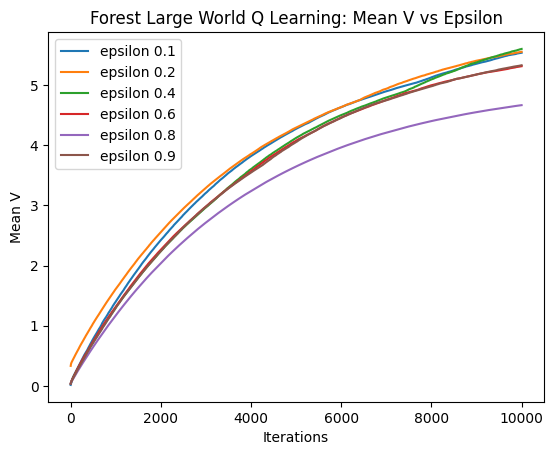

In [27]:
plt.figure()
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.1]['Mean V'], label = "epsilon 0.1")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.2]['Mean V'], label = "epsilon 0.2")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.4]['Mean V'], label = "epsilon 0.4")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.6]['Mean V'], label = "epsilon 0.6")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.8]['Mean V'], label = "epsilon 0.8")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.9]['Mean V'], label = "epsilon 0.9")
plt.xlabel('Iterations')
plt.ylabel('Mean V')
plt.title('Forest Large World Q Learning: Mean V vs Epsilon')
plt.legend()
plt.savefig('./plots/forest_large_QL_meanv_eps.png')
plt.show()

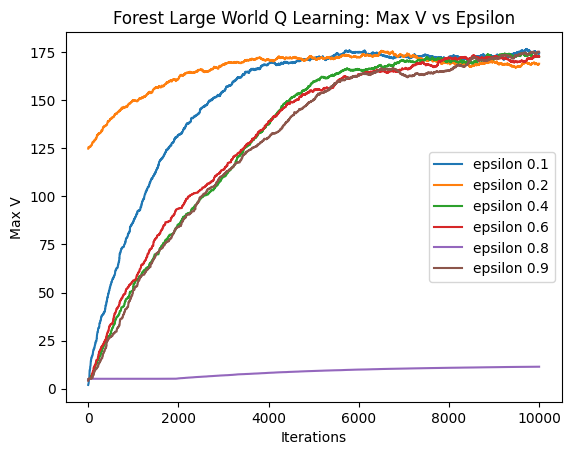

In [28]:
plt.figure()
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.1]['Max V'], label = "epsilon 0.1")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.2]['Max V'], label = "epsilon 0.2")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.4]['Max V'], label = "epsilon 0.4")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.6]['Max V'], label = "epsilon 0.6")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.8]['Max V'], label = "epsilon 0.8")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.9]['Max V'], label = "epsilon 0.9")
plt.xlabel('Iterations')
plt.ylabel('Max V')
plt.title('Forest Large World Q Learning: Max V vs Epsilon')
plt.legend()
plt.savefig('./plots/forest_large_QL_maxv_eps.png')
plt.show()

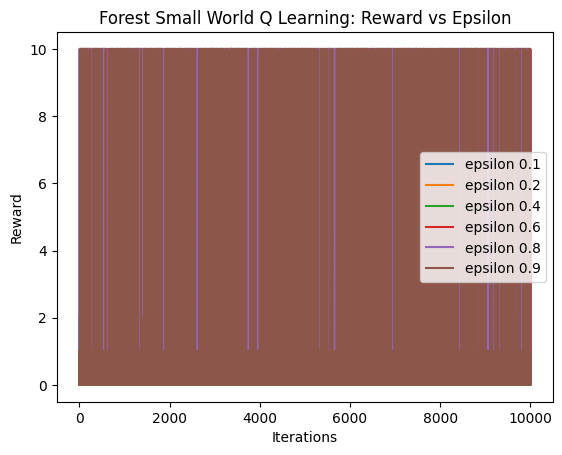

In [25]:
plt.figure()
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.1]['Reward'], label = "epsilon 0.1")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.2]['Reward'], label = "epsilon 0.2")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.4]['Reward'], label = "epsilon 0.4")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.6]['Reward'], label = "epsilon 0.6")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.8]['Reward'], label = "epsilon 0.8")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.9]['Reward'], label = "epsilon 0.9")
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.title('Forest Large World Q Learning: Reward vs Epsilon')
plt.legend()
#plt.savefig('./plots/forest_large_QL_reward_eps.png')
plt.show()

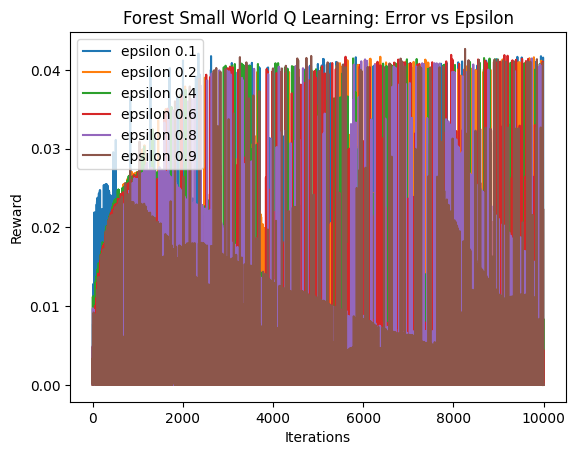

In [27]:
plt.figure()
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.1]['Error'], label = "epsilon 0.1")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.2]['Error'], label = "epsilon 0.2")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.4]['Error'], label = "epsilon 0.4")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.6]['Error'], label = "epsilon 0.6")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.8]['Error'], label = "epsilon 0.8")
plt.plot(qlearn_df[qlearn_df['epsilon'] == 0.9]['Error'], label = "epsilon 0.9")
plt.xlabel('Iterations')
plt.ylabel('Reward')
plt.title('Forest Large World Q Learning: Error vs Epsilon')
plt.legend()
#plt.savefig('./plots/forest_large_QL_error_eps.png')
plt.show()

              epsilon         Time  Iteration       Max V
epsilon                                                  
0.1     9999      0.1  3736.811110  100000000  174.267715
0.2     9999      0.2  3753.848928  100000000  168.945268
0.4     9999      0.4  3764.834151  100000000  172.575819
0.6     9999      0.6  3766.087613  100000000  172.898677
0.8     9999      0.8  3745.201943  100000000   11.425001
0.9     9999      0.9  3760.809893  100000000  175.113975


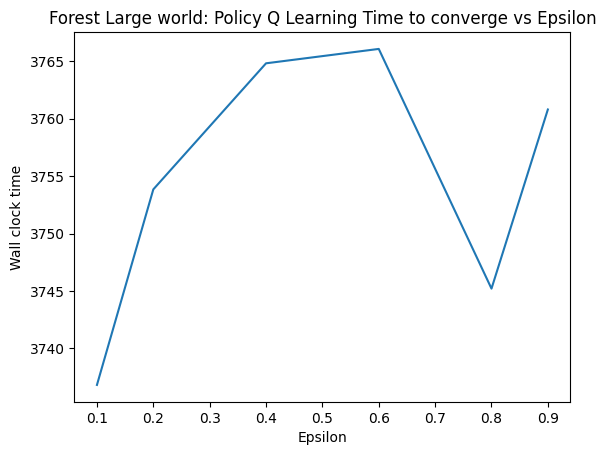

In [29]:
qlg = pd.DataFrame(qlearn_df[['epsilon','Time','Iteration','Max V']].
                   groupby('epsilon').apply(lambda x: x.iloc[[ -1]]))
print(qlg)

plt.plot(qlg['epsilon'], qlg['Time'])
plt.xlabel('Epsilon')
plt.ylabel('Wall clock time')
plt.title('Forest Large world: Policy Q Learning Time to converge vs Epsilon')
plt.savefig('./plots/forest_large_ql_time_eps.png')
plt.show()

In [30]:
ql = QLearning(mdp_p, mdp_r, n_iter=1e8, gamma=0.9, alpha=0.5, epsilon=0.1)
ql.run()
ql_policy = ql.policy

In [31]:
ql_policy

(0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
